Logistic Regression 

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import io
%matplotlib inline
import seaborn as sns;sns.set()
from sklearn import preprocessing
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)


In [5]:
#built in colab with local data upload
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print("user uploaded files'{name}' with length{length}bytes".format(
      name=fn,length=len(uploaded[fn])
  ))

Saving candy-data.csv to candy-data (1).csv
user uploaded files'candy-data.csv' with length5205bytes


In [37]:
#explore data
df=pd.read_csv(io.StringIO(uploaded["candy-data.csv"].decode("utf-8")))
df=df[["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus","sugarpercent","pricepercent","winpercent"]]

df.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [38]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [39]:
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(df,test_size=0.2)

In [40]:
train_df=trainset
test_df=testset

In [41]:
X_train=train_df[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
       'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent',
       'winpercent']]


X_test=test_df[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
       'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent',
       'winpercent']]



In [42]:
train_df.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [44]:
y_train=train_df["chocolate"]
y_test=test_df["chocolate"]

In [45]:
y_test.head()

4     0
56    1
9     0
21    0
55    0
Name: chocolate, dtype: int64

Data Exploration

In [47]:
y_train.value_counts()

0    41
1    27
Name: chocolate, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


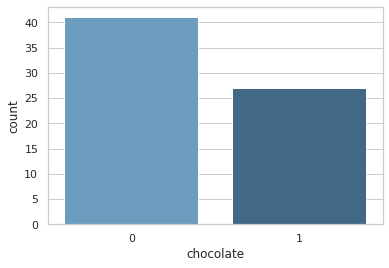

<Figure size 432x288 with 0 Axes>

In [48]:
sns.countplot("chocolate",data=train_df,palette="Blues_d")
plt.show()
plt.savefig("count_plot")

model development

In [49]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])